<b>Midterm project - Kaggle exercise project</b><br>
https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Goals

Get familar with Kaggle competition since our final project may be a real Kaggle competition.<br>
Practice on large data set<br>
Data quality checking, missing data imputation<br>
Feature selection. What's your rationals to choose those features.<br>
Create at least 5 new features and explain your reason for every new features.<br>
Use feature importance to help you choose 10 features<br>
Choose 3 ML algorithms we covered in the class to build your prediction models<br>
For each model you build, you will need to evaluate and show your effort to improve it.<br>
Your jupyter submission should be in an article quality. Do NOT print huge data set in the notebook. Use head(). Use plotting to visualize your analysis and results. Use markdown to write your comments.<br>
Your score is based on completeness on every step.<br>
Submit in HTML and ipynb format on canvas<br>

<b>Importing Libraries</b>

In [1]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,r2_score
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.decomposition import PCA
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
%matplotlib notebook
%matplotlib inline

<b>Reading the Data</b>

In [3]:
df=pd.read_csv("train.csv")

<b>3. Data quality checking, missing data imputation</b>

In [4]:
df.describe(include="all")

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [5]:
df.columns=df.columns.str.lower()

In [6]:
df.isnull().values.all(axis=0)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [7]:
df.drop(['id'],axis=1,inplace=True)

In [8]:
df.columns[(df.isnull().sum()/len(df)).sort_values(ascending=False)>0.6]

Index(['mssubclass', 'mszoning', 'lotfrontage', 'lotarea'], dtype='object')

In [9]:
df_40_null_col=df.columns[(df.isnull().sum()/len(df))>=0.6]
df.drop(df_40_null_col,axis=1,inplace=True)

In [10]:
df.columns[(df.isnull().sum()/len(df))>0]

Index(['lotfrontage', 'masvnrtype', 'masvnrarea', 'bsmtqual', 'bsmtcond',
       'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'electrical',
       'fireplacequ', 'garagetype', 'garageyrblt', 'garagefinish',
       'garagequal', 'garagecond'],
      dtype='object')

In [11]:
# handling null values by using fillna()
df.fillna(method='ffill',inplace=True)
#bfill had to be used because the first row value for fireplacequ column had a nan value
df.fireplacequ.fillna(method='bfill',inplace=True)
# replacing the target value with mode of the entire column
# df["saleprice"].fillna(df["saleprice"].mean())

In [12]:
df.isnull().sum()

mssubclass       0
mszoning         0
lotfrontage      0
lotarea          0
street           0
                ..
mosold           0
yrsold           0
saletype         0
salecondition    0
saleprice        0
Length: 76, dtype: int64

In [13]:
df.columns[(df.isnull().sum()/len(df))>0]
# no columns has nan values 

Index([], dtype='object')

In [14]:
# df['totalbath'] = df['bsmtfullbath'] + df['fullBath'] + df['bsmthalfbath'].apply(lambda x: 0.5*x if x > 0 else 0)
# + df['halfbath'].apply(lambda y: 0.5*y if y > 0 else 0)
df['totalfloors'] = df['2ndflrsf'] + df['1stflrsf']
df['yearsSinceRemodel'] = df['yearremodadd'].astype(int) - df['yearbuilt'].astype(int)
df['totalporchsf'] = (df['openporchsf'] + df['wooddecksf'])

In [15]:
# droppin columns which are used to create new columns/features 
drop_cols=["2ndflrsf","1stflrsf","yearremodadd","yearbuilt","openporchsf","wooddecksf"]
df.drop(drop_cols, axis=1, inplace=True)

<AxesSubplot:>

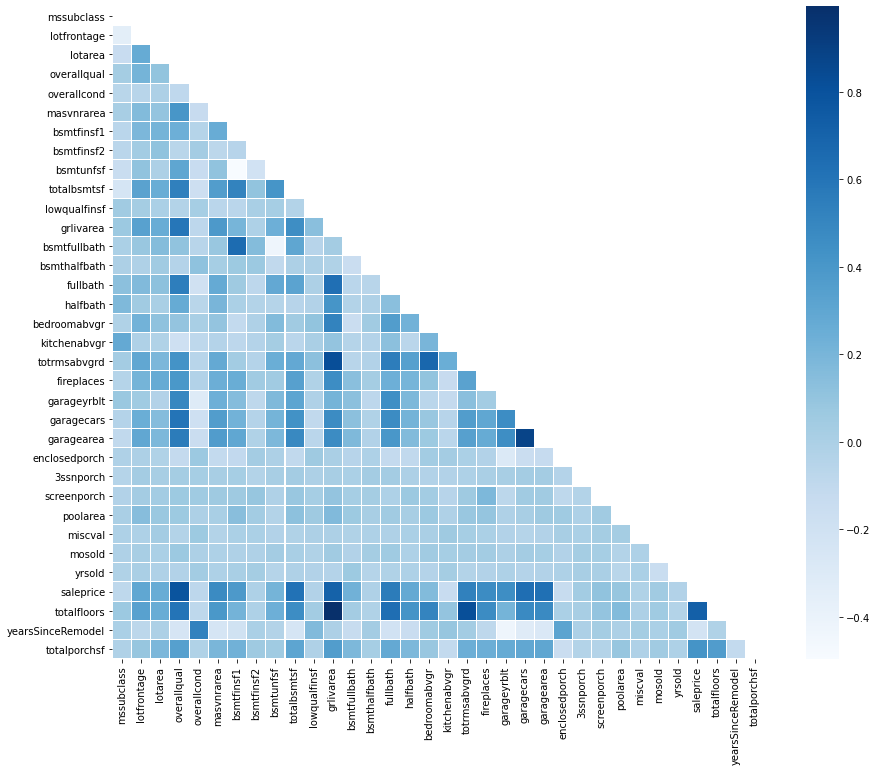

In [16]:
# Checking correlation between different numerical featuers
fig = plt.figure(figsize=(15,12)) 
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), cmap='Blues', mask=mask, linewidth=0.05, square=True)

In [17]:
correlation_table = pd.DataFrame(df.corr().unstack().sort_values().drop_duplicates(), columns=['correlation'])
correlation_table[(correlation_table['correlation'] >0.8) | (correlation_table['correlation'] < -0.8)].sort_values(by='correlation', ascending = False)

,,correlation
mssubclass,mssubclass,1.000000
grlivarea,totalfloors,0.995718
garagecars,garagearea,0.882475
grlivarea,totrmsabvgrd,0.825489
totalfloors,totrmsabvgrd,0.820088


In [18]:
# we will be dropping columns since both of the pair is higly correlated 
columns_drop=["garagecars","grlivarea","totrmsabvgrd","garageyrblt"]
df.drop(columns_drop, axis=1, inplace=True)

In [19]:
normz_columns_list=df.select_dtypes(exclude="object").columns.to_list()
(df[normz_columns_list]==0).sum(axis=0)/df.shape[0]

mssubclass           0.000000
lotfrontage          0.000000
lotarea              0.000000
overallqual          0.000000
overallcond          0.000000
masvnrarea           0.593151
bsmtfinsf1           0.319863
bsmtfinsf2           0.885616
bsmtunfsf            0.080822
totalbsmtsf          0.025342
lowqualfinsf         0.982192
bsmtfullbath         0.586301
bsmthalfbath         0.943836
fullbath             0.006164
halfbath             0.625342
bedroomabvgr         0.004110
kitchenabvgr         0.000685
fireplaces           0.472603
garagearea           0.055479
enclosedporch        0.857534
3ssnporch            0.983562
screenporch          0.920548
poolarea             0.995205
miscval              0.964384
mosold               0.000000
yrsold               0.000000
saleprice            0.000000
totalfloors          0.000000
yearsSinceRemodel    0.523288
totalporchsf         0.269863
dtype: float64

In [20]:
# and based on the correlation we will drop columns which have very low or high correlation with the saleprice column and
# columns that are filled with zeros
columns_drop=["mssubclass","overallcond","masvnrarea","bsmtfinsf1","bsmtfinsf2","bsmtunfsf",
             "lowqualfinsf","bsmtfullbath","bsmthalfbath","halfbath","bedroomabvgr","kitchenabvgr","fireplaces"
           ,"enclosedporch","3ssnporch","screenporch","poolarea","miscval","mosold","yrsold"]
df.drop(columns_drop, axis=1, inplace=True)

<ipython-input-21-221126ef05e9>:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,4, figsize=(15,3))


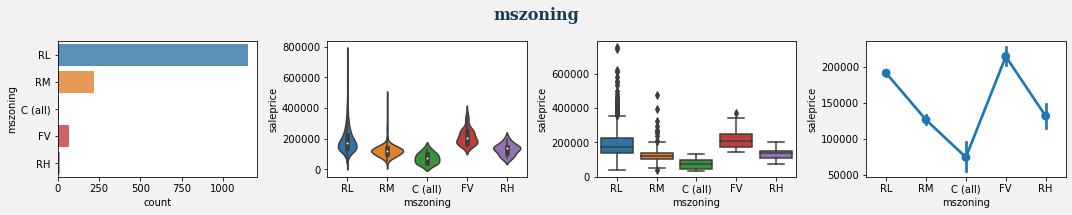

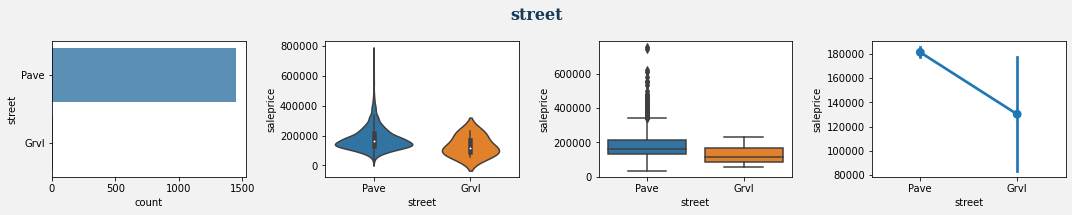

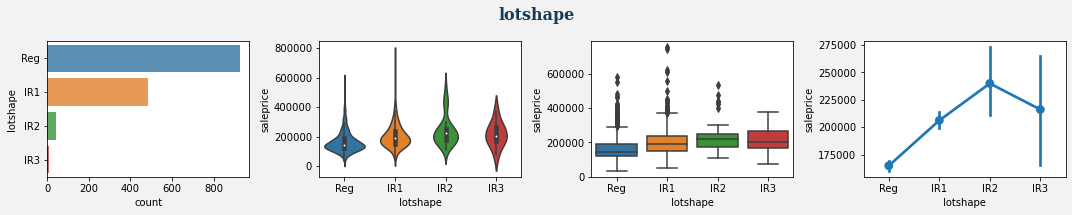

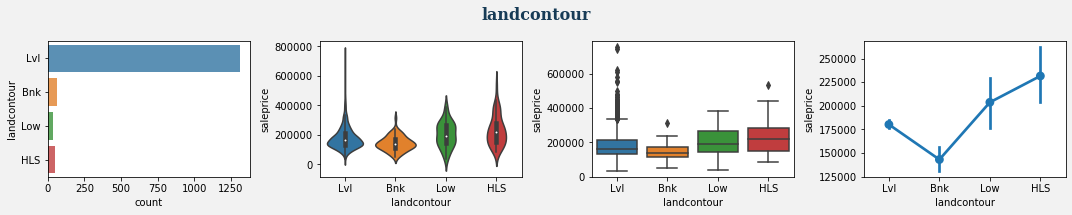

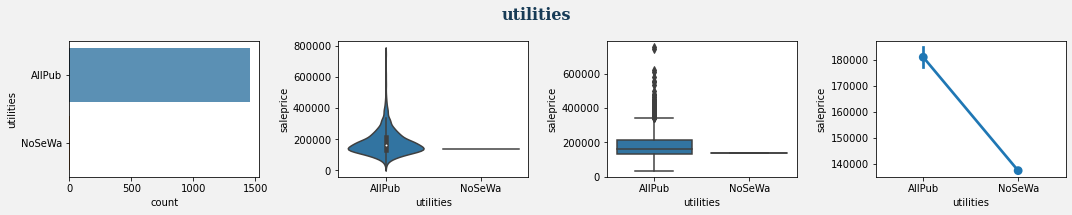

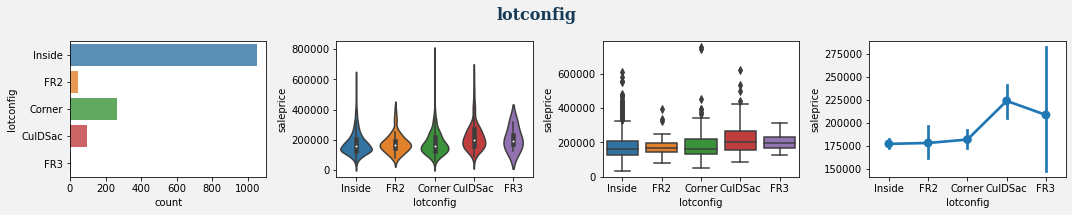

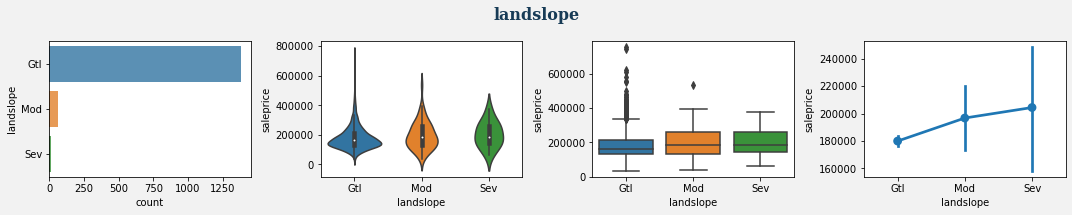

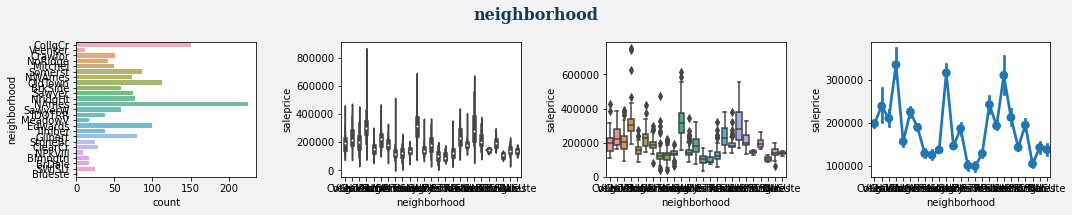

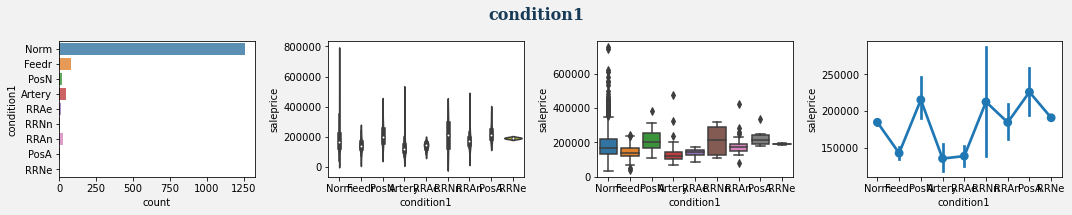

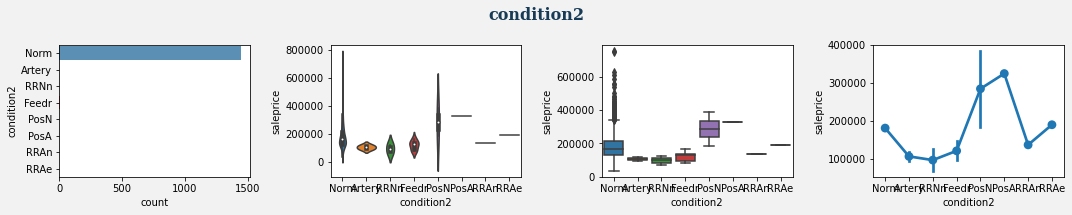

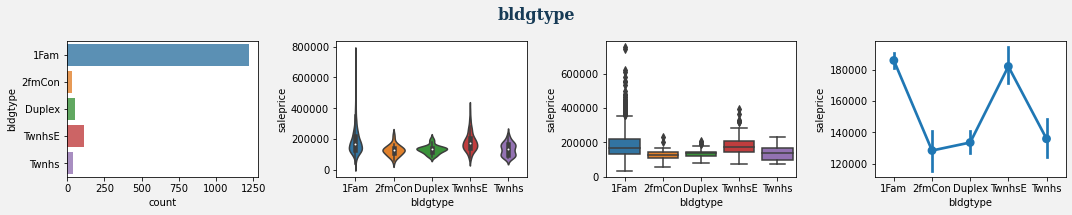

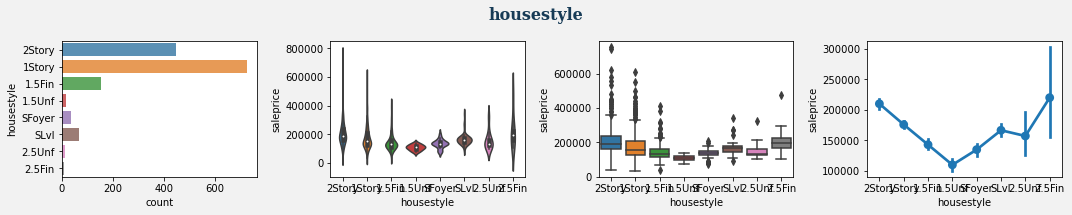

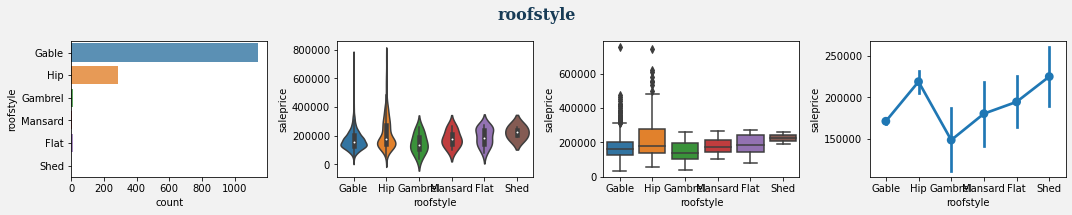

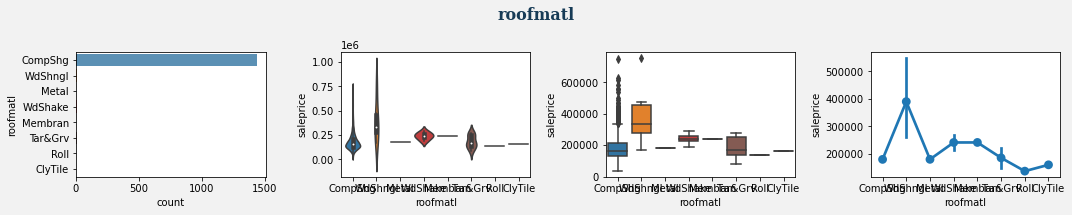

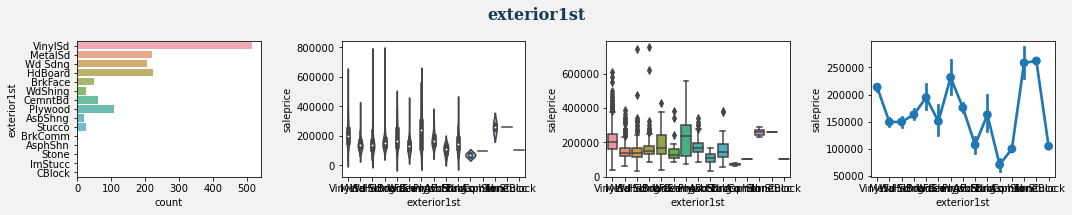

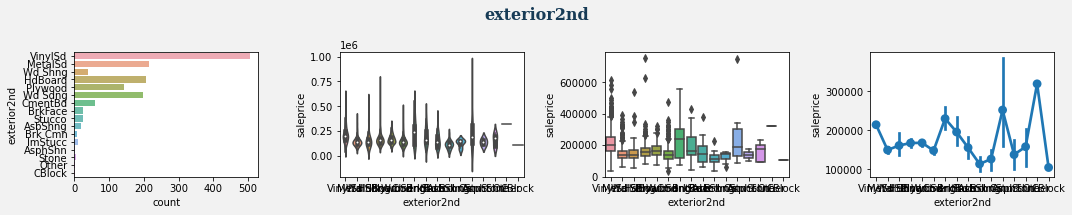

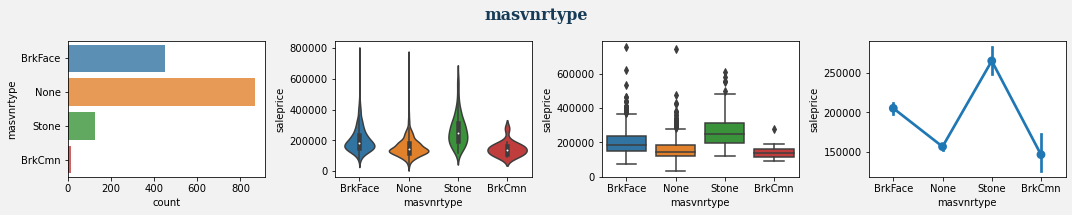

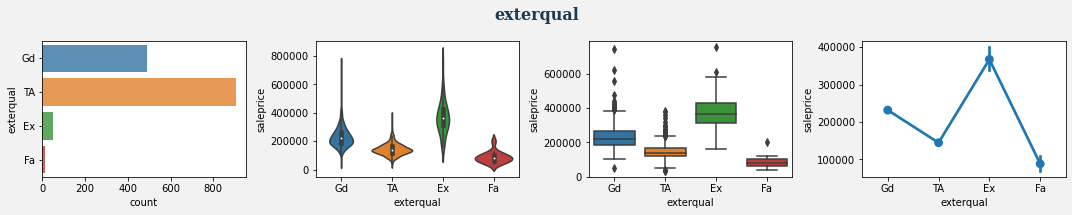

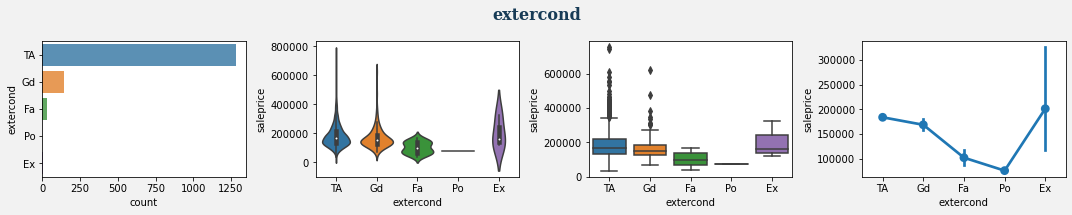

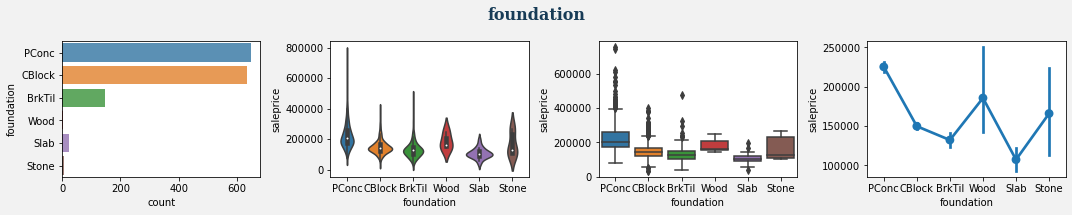

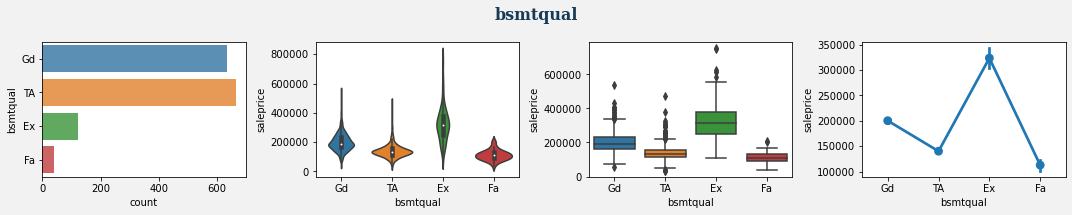

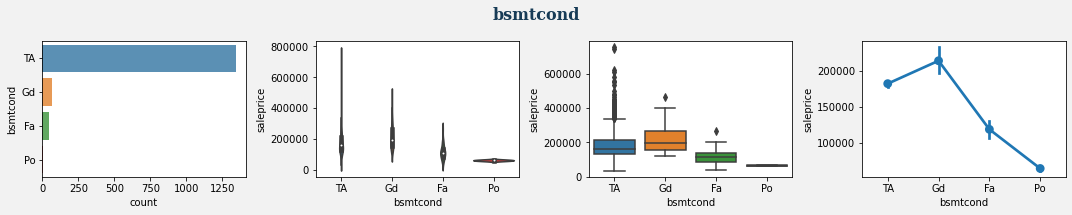

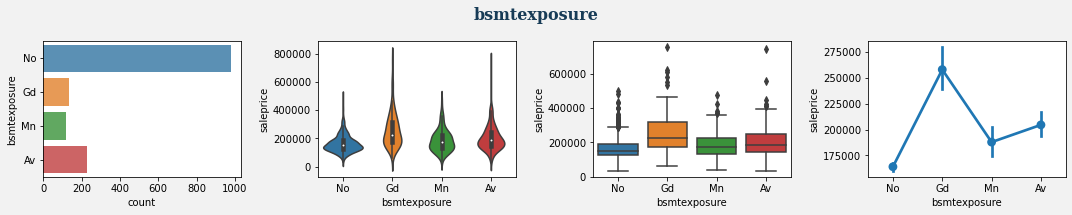

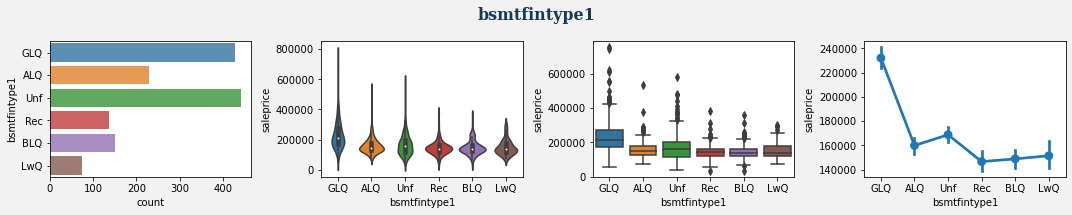

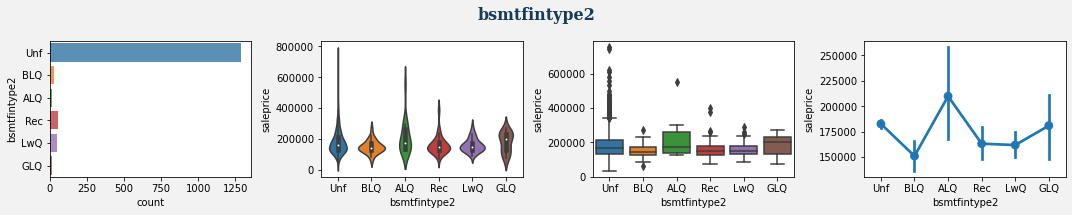

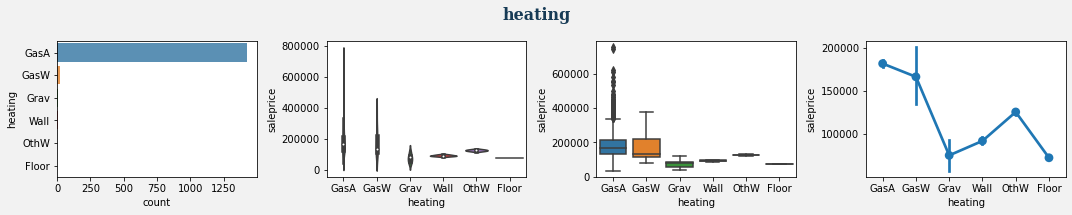

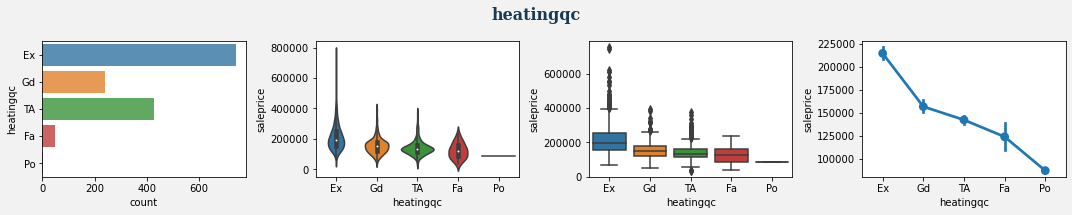

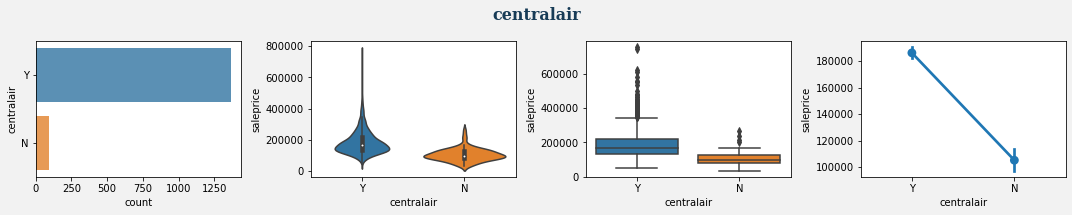

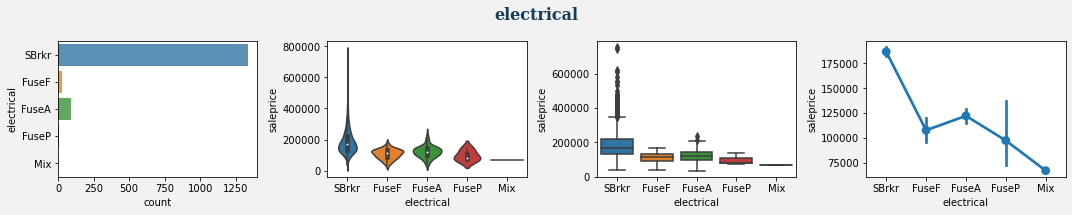

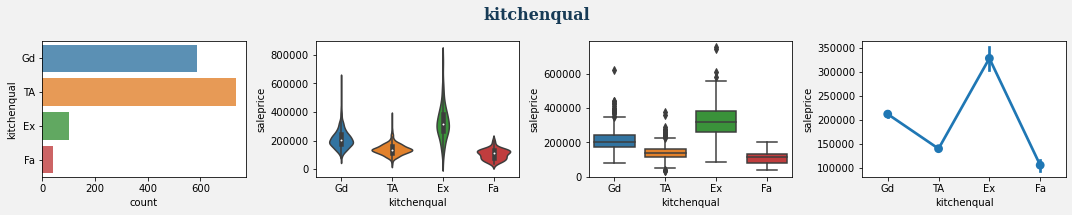

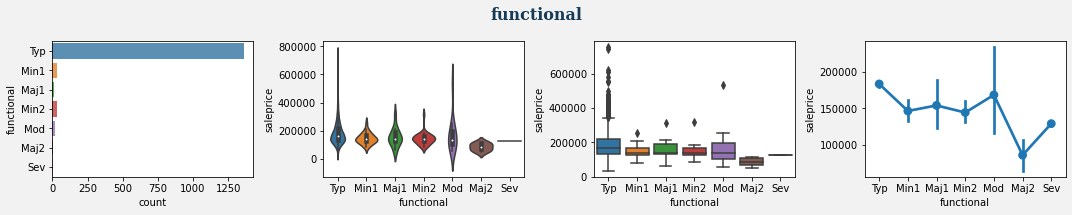

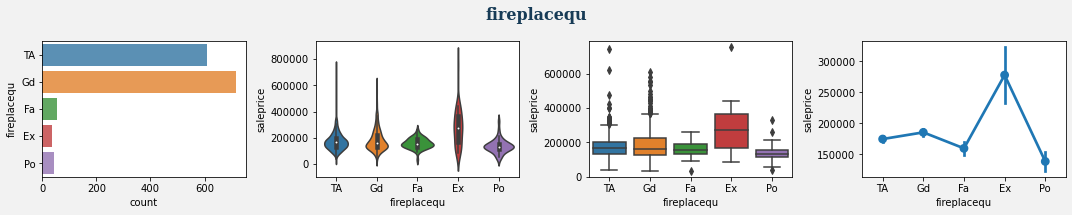

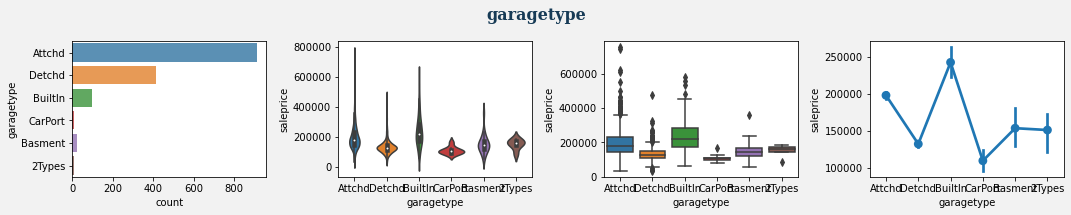

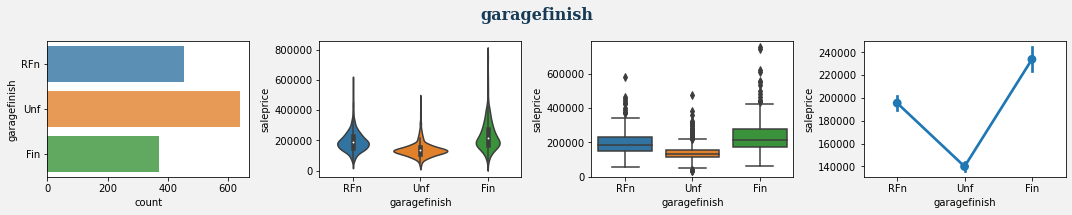

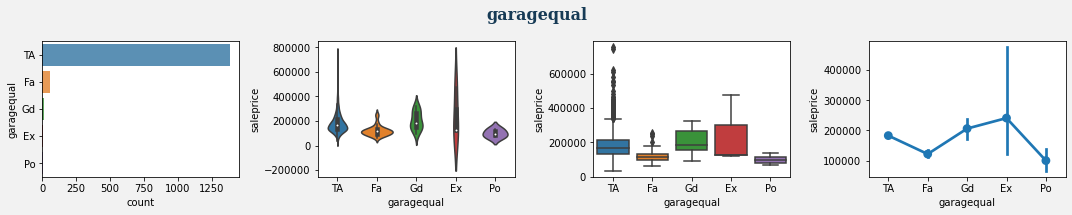

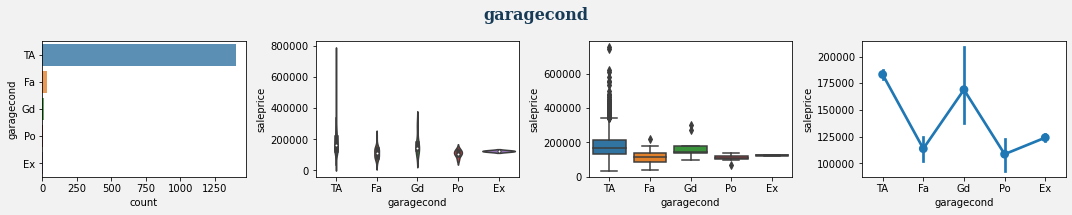

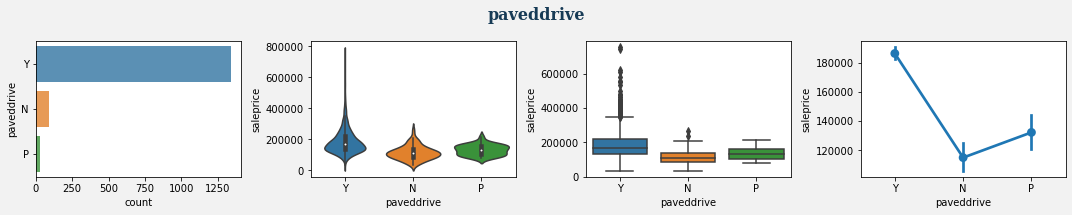

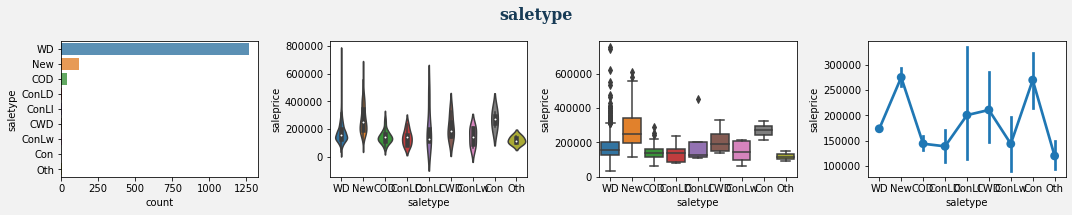

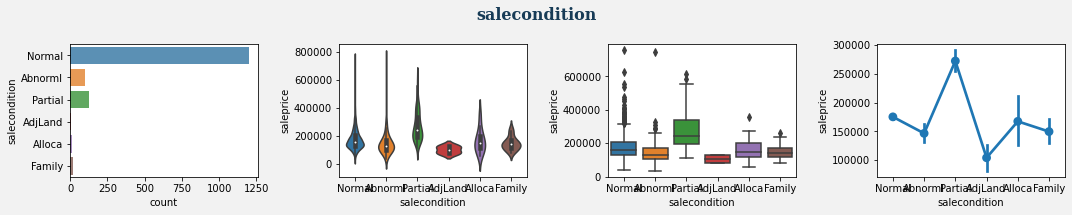

In [21]:
cat_cols = df.select_dtypes(include='object').columns.tolist()

#palette = ['#8abbd0', '#FB9851', '#36E2BD','#D0E1E1']

for feature in cat_cols:
    fig, ax = plt.subplots(1,4, figsize=(15,3))
    fig.patch.set_facecolor('#F2F2F2')
    
    sns.countplot(y=feature, data=df, alpha=0.8, ax=ax[0])
    sns.violinplot(y='saleprice', x=feature, data=df, ax=ax[1])
    sns.boxplot(y='saleprice', x=feature, data=df, ax=ax[2])
    sns.pointplot(y='saleprice', x=feature, data=df, ax=ax[3])
    
    plt.suptitle(feature, fontfamily='serif', fontsize=16, color='#173b56', fontweight='bold')
    plt.tight_layout()

In [22]:
# removing columns because the classes  in this columns very imbalanced few are like 98% of the total column weight and rest of them are just 0.1 or 0.2%
#this entire analysis was based on the above plots mostly it is bar plots 
cat_cols_drop=["mszoning","street","landcontour","utilities","lotconfig","landslope","condition1","condition2","bldgtype",
               "housestyle","roofstyle","roofmatl","exterior1st","exterior2nd","extercond","bsmtcond","bsmtfintype2","heating","functional","garagequal"]
df.drop(cat_cols_drop,axis=1,inplace=True)

In [23]:
# # normalization
# scaler=MinMaxScaler()
# normz_columns_list=df.select_dtypes(exclude="object").columns.to_list()
# df[normz_columns_list]= pd.DataFrame(scaler.fit_transform(df[normz_columns_list]), columns=normz_columns_list)
# df
df

,lotfrontage,lotarea,lotshape,neighborhood,overallqual,masvnrtype,exterqual,foundation,bsmtqual,bsmtexposure,...,garagefinish,garagearea,garagecond,paveddrive,saletype,salecondition,saleprice,totalfloors,yearsSinceRemodel,totalporchsf
0,65.0,8450,Reg,CollgCr,7,BrkFace,Gd,PConc,Gd,No,...,RFn,548,TA,Y,WD,Normal,208500,1710,0,61
1,80.0,9600,Reg,Veenker,6,None,TA,CBlock,Gd,Gd,...,RFn,460,TA,Y,WD,Normal,181500,1262,0,298
2,68.0,11250,IR1,CollgCr,7,BrkFace,Gd,PConc,Gd,Mn,...,RFn,608,TA,Y,WD,Normal,223500,1786,1,42
3,60.0,9550,IR1,Crawfor,7,None,TA,BrkTil,TA,No,...,Unf,642,TA,Y,WD,Abnorml,140000,1717,55,35
4,84.0,14260,IR1,NoRidge,8,BrkFace,Gd,PConc,Gd,Av,...,RFn,836,TA,Y,WD,Normal,250000,2198,0,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,Reg,Gilbert,6,None,TA,PConc,Gd,No,...,RFn,460,TA,Y,WD,Normal,175000,1647,1,40
1456,85.0,13175,Reg,NWAmes,6,Stone,TA,CBlock,Gd,No,...,Unf,500,TA,Y,WD,Normal,210000,2073,10,349
1457,66.0,9042,Reg,Crawfor,7,None,Ex,Stone,TA,No,...,RFn,252,TA,Y,WD,Normal,266500,2340,65,60
1458,68.0,9717,Reg,NAmes,5,None,TA,CBlock,TA,Mn,...,Unf,240,TA,Y,WD,Normal,142125,1078,46,366


In [24]:
# label encoding for columns that has objects 
object_df=df.select_dtypes(include='object')
object_df_columns=object_df.columns.to_list()
label_encoder=LabelEncoder()
df[object_df_columns]=df[object_df_columns].apply(label_encoder.fit_transform)
df

,lotfrontage,lotarea,lotshape,neighborhood,overallqual,masvnrtype,exterqual,foundation,bsmtqual,bsmtexposure,...,garagefinish,garagearea,garagecond,paveddrive,saletype,salecondition,saleprice,totalfloors,yearsSinceRemodel,totalporchsf
0,65.0,8450,3,5,7,1,2,2,2,3,...,1,548,4,2,8,4,208500,1710,0,61
1,80.0,9600,3,24,6,2,3,1,2,1,...,1,460,4,2,8,4,181500,1262,0,298
2,68.0,11250,0,5,7,1,2,2,2,2,...,1,608,4,2,8,4,223500,1786,1,42
3,60.0,9550,0,6,7,2,3,0,3,3,...,2,642,4,2,8,0,140000,1717,55,35
4,84.0,14260,0,15,8,1,2,2,2,0,...,1,836,4,2,8,4,250000,2198,0,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,3,8,6,2,3,2,2,3,...,1,460,4,2,8,4,175000,1647,1,40
1456,85.0,13175,3,14,6,3,3,1,2,3,...,2,500,4,2,8,4,210000,2073,10,349
1457,66.0,9042,3,6,7,2,0,4,3,3,...,1,252,4,2,8,4,266500,2340,65,60
1458,68.0,9717,3,12,5,2,3,1,3,2,...,2,240,4,2,8,4,142125,1078,46,366


In [25]:
pca = PCA()
normz_columns_list=df.select_dtypes(exclude="object").columns.to_list()
df[normz_columns_list] = pca.fit_transform(df[normz_columns_list])
df_num= pd.DataFrame(df[normz_columns_list])
df_num.head()

,lotfrontage,lotarea,lotshape,neighborhood,overallqual,masvnrtype,exterqual,foundation,bsmtqual,bsmtexposure,...,garagefinish,garagearea,garagecond,paveddrive,saletype,salecondition,saleprice,totalfloors,yearsSinceRemodel,totalporchsf
0,27493.527537,-2994.097039,1.109833,-290.434152,49.524797,-97.114315,-13.864617,-7.733244,7.500881,0.471523,...,-0.179879,-0.083168,0.294033,0.569491,-0.034389,0.115538,0.165682,0.111524,-0.114261,-0.008798
1,547.269482,-935.674271,-174.163407,267.573617,-15.047077,162.800339,-9.187189,12.571040,-11.521150,1.476793,...,-0.393526,0.198285,-0.661565,-0.177527,-0.377572,-0.267926,0.065425,-0.269818,-0.543711,0.020668
2,42579.575795,-700.039959,-1.911146,-284.379971,80.539480,-132.881662,-11.353535,-7.987337,7.866396,0.820563,...,-0.272254,-0.130832,0.339899,0.622700,-0.022507,0.123959,0.177183,0.110060,-0.097250,0.000439
3,-40929.656529,410.560599,348.193132,-247.382078,233.040802,-103.975741,38.677789,-9.815358,6.544188,3.466574,...,-1.177717,-0.326141,-0.001662,-0.496002,-0.772145,-0.439654,-0.172976,-0.084874,0.300952,0.001354
4,69168.574417,1419.262522,319.121542,-221.195094,255.159743,50.315605,-8.880463,1.363170,-0.741050,0.787346,...,-1.077574,-0.074834,0.377322,0.457960,0.028757,0.150052,0.152587,0.048448,0.115265,0.032962


In [26]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.85512184e-01, 1.44418769e-02, 2.05391224e-05, 1.84147752e-05,
       4.19659228e-06, 2.62808373e-06, 8.06648184e-08, 7.12568308e-08,
       5.32101424e-09, 5.43654862e-10, 4.50212507e-10, 3.80380927e-10,
       3.26260954e-10, 2.79365703e-10, 1.86132603e-10, 1.70895624e-10,
       1.64910385e-10, 1.49575297e-10, 1.07508825e-10, 7.74665059e-11,
       5.57795205e-11, 5.43925294e-11, 4.94422372e-11, 4.75733439e-11,
       3.79527261e-11, 2.86913477e-11, 2.62275151e-11, 2.22446556e-11,
       6.88361150e-12])

In [27]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.85512184e-01, 1.44418769e-02, 2.05391224e-05, 1.84147752e-05,
       4.19659228e-06, 2.62808373e-06, 8.06648184e-08, 7.12568308e-08,
       5.32101424e-09, 5.43654862e-10, 4.50212507e-10, 3.80380927e-10,
       3.26260954e-10, 2.79365703e-10, 1.86132603e-10, 1.70895624e-10,
       1.64910385e-10, 1.49575297e-10, 1.07508825e-10, 7.74665059e-11,
       5.57795205e-11, 5.43925294e-11, 4.94422372e-11, 4.75733439e-11,
       3.79527261e-11, 2.86913477e-11, 2.62275151e-11, 2.22446556e-11,
       6.88361150e-12])

In [31]:
trainX,testX,trainY,testY = train_test_split(df.iloc[:,], df.iloc[:,25], random_state=1)
# df.columns.get_loc("saleprice")
# df.iloc[:,25]

In [32]:
trainX

,lotfrontage,lotarea,lotshape,neighborhood,overallqual,masvnrtype,exterqual,foundation,bsmtqual,bsmtexposure,...,garagefinish,garagearea,garagecond,paveddrive,saletype,salecondition,saleprice,totalfloors,yearsSinceRemodel,totalporchsf
6,125994.028837,-4672.541653,-312.186096,317.634390,-51.367365,91.725236,3.030946,-0.065056,-6.612360,-0.223947,...,0.240158,-0.585254,-1.606555,-0.023063,-0.155863,-0.287037,-0.038548,-0.146071,-0.064146,0.034694
807,42920.780504,9429.336674,-139.985688,122.468265,-13.731179,131.337507,64.176340,76.046114,10.856959,0.961219,...,0.345858,-0.092641,0.382599,-0.381400,0.255087,-0.210625,-0.466051,0.037785,0.175980,0.019980
955,-36012.129290,-2168.401432,615.695975,-115.975169,45.327864,-139.915563,-19.203966,4.300958,5.531930,0.486108,...,-0.583913,-0.101841,-0.435724,0.994332,-0.193566,-0.348620,-0.015613,0.012083,-0.358515,0.779485
1040,-25816.813187,3480.563064,422.552522,33.755310,14.075932,-146.077592,22.325813,12.666137,-6.912640,-0.740541,...,-0.028297,1.148647,0.674359,1.021233,0.231947,-0.201431,-0.129003,0.113451,-0.372997,-0.031843
701,-40929.405839,460.055401,-80.678581,285.305500,93.966190,-118.338744,-10.464923,7.722444,-2.179319,-2.199221,...,-1.591735,-0.167177,0.231816,0.556215,0.187819,0.185351,-0.113092,-0.193918,0.376031,0.038394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-15925.396406,158.521833,-69.653429,81.902676,18.664328,-128.938364,-13.475172,5.547615,-2.156252,-0.940928,...,0.011603,0.632587,-0.235514,0.463493,-0.257468,-0.273583,-0.072674,-0.110277,-0.444748,-0.036368
905,-52912.895367,1182.806222,-158.270098,210.051360,-122.277733,-88.931394,-17.704285,12.587105,-1.220341,-0.488896,...,0.523249,-0.379079,-0.369626,-1.280988,-0.117823,-0.156048,-0.040835,0.197101,0.240652,-0.042309
1096,-54014.721021,-1820.183197,33.660967,-239.155325,-361.431629,68.459079,61.547078,9.721660,1.568387,-0.364459,...,0.184070,-0.176769,0.176335,-0.202563,1.302280,0.113663,-0.952323,0.248378,0.379578,-0.062421
235,-91669.806438,-5759.406618,-136.076764,-214.327329,-30.273831,-51.015217,-17.762193,-37.312458,8.207413,3.103801,...,-1.064667,0.139332,0.186229,0.349902,-0.067323,-0.035482,0.036404,0.002470,0.202955,-0.030320


In [33]:
trainY

6      -0.038548
807    -0.466051
955    -0.015613
1040   -0.129003
701    -0.113092
          ...   
715    -0.072674
905    -0.040835
1096   -0.952323
235     0.036404
1061    1.106208
Name: saleprice, Length: 1095, dtype: float64

In [34]:
dr=DecisionTreeRegressor()
dr.fit(trainX,trainY)
zipped=list(zip(df.columns, dr.feature_importances_))
features_sorted=sorted(zipped, key=lambda x: x[1])
features_sorted

[('centralair', 1.200126657749359e-07),
 ('foundation', 5.943314185661168e-07),
 ('garagefinish', 7.525546858274248e-07),
 ('garagearea', 9.76118638307849e-07),
 ('bsmtqual', 1.344313402808326e-06),
 ('lotshape', 1.9153142952315534e-06),
 ('saletype', 2.5501700114875483e-06),
 ('salecondition', 3.3636676422249743e-06),
 ('totalfloors', 3.380057833475991e-06),
 ('kitchenqual', 4.758658977338772e-06),
 ('lotfrontage', 4.863611001139388e-06),
 ('paveddrive', 5.03463034569265e-06),
 ('neighborhood', 5.206782718093053e-06),
 ('bsmtfintype1', 5.244814278303924e-06),
 ('garagecond', 5.498630920663286e-06),
 ('bsmtexposure', 6.674329529991988e-06),
 ('overallqual', 7.757634982945016e-06),
 ('electrical', 7.75990300597657e-06),
 ('garagetype', 9.441248002921635e-06),
 ('fullbath', 1.5244456792621916e-05),
 ('masvnrtype', 2.3869534256599025e-05),
 ('exterqual', 3.16042229479033e-05),
 ('lotarea', 3.245244195435643e-05),
 ('fireplacequ', 3.851777439241243e-05),
 ('totalbsmtsf', 8.964303514274903e

In [35]:
# backword elimination
lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=5, forward=True, verbose=1, scoring='neg_mean_squared_error')
X=df.iloc[:,0:-1]
y=df.iloc[:,-1]
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.5s finished
Features: 1/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.5s finished
Features: 2/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.5s finished
Features: 3/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished
Features: 4/5[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.3s finished
Features: 5/5

In [36]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['masvnrtype', 'foundation', 'heatingqc', 'centralair', 'paveddrive']


In [37]:
#  based on the feature importance and backword elimination we have selected few features to train the model 
imp_columns=feat_names

In [38]:
imp_columns

['masvnrtype', 'foundation', 'heatingqc', 'centralair', 'paveddrive']

In [39]:
regressor = LinearRegression()  
regressor.fit(trainX, trainY)

LinearRegression()

In [40]:
y_pred = regressor.predict(testX)

In [41]:
r2_score(testY,y_pred)

1.0

In [42]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(trainX, trainY)

DecisionTreeRegressor(random_state=0)

In [43]:
regressor_predict = regressor.predict(testX)

In [44]:
regressor_predict

array([ 1.77183404e-01, -6.54960874e-01,  3.75676753e-02, -8.92338302e-02,
       -3.28436894e-02, -7.02888801e-01, -6.17806275e-01, -5.46359915e-01,
       -5.19042566e-02,  3.64783085e-02,  8.41058794e-02,  1.87284770e-01,
        3.19745265e-02, -1.04425509e-01,  3.17937753e-01, -1.09314715e+00,
       -4.50611003e-02,  4.47435938e-02, -5.75540741e-02, -1.12477932e-02,
       -1.51846767e-01,  1.02317339e+00,  9.02807187e-02,  4.41389847e-01,
        4.11154752e-01, -2.87741763e-01, -1.06693506e+00, -1.70161339e-01,
        3.45934794e-01,  9.79726968e-02,  6.30802952e-01,  2.11925349e-02,
        7.54533604e-02, -5.46359915e-01, -1.74732467e-01, -6.26142764e-01,
       -1.34491556e-01, -1.65046774e+00, -3.97771654e-01, -4.58284372e-01,
       -2.12295654e-01, -2.24632929e-01, -1.01148485e-03, -3.53103737e-01,
       -4.62355889e-02, -1.51262557e-02, -3.32433560e-01, -4.84764801e-02,
        5.69696043e-02,  1.31024386e-01, -3.00340229e-01, -4.69226365e-01,
       -8.68789684e-01,  

In [45]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(trainX, trainY)

DecisionTreeRegressor(random_state=0)

In [46]:
regressor_predict = regressor.predict(testX)